https://arxiv.org/pdf/2104.10470  
https://arxiv.org/pdf/1602.01260

# Detrending Moving Average (DMA)

**Detrending Moving Average (DMA)** is another method for detecting long-range dependencies and non-stationarities. Unlike DFA, which uses polynomial fitting, DMA uses moving averages to detrend the time series.

## Steps in DMA:
1. Moving Average Calculation:
    - Calculate the moving average $M_t$ of the times $x_t$ over a window of size $n$. $$M_t = \frac{1}{n}\sum_{i = t-n+1}^t x_i$$
    
2. Detrending:
    - Subtract the moving average from the original time series to obtain the detrended series. $$Y_t = x_t - M_t$$
    
3. Fluctuation Calculation:
    - Compute the root-mean-square fluctuation of the detrended series. $$F(n) = \sqrt{\frac{1}{N-n+1}\sum_{t=n}^N Y(t)^2}$$
    
4. Scaling Behavior:
    - Similar to DFA, repeat the process for different window sizes $n$ and plot $\log F(n)$ versus $\log n$.
    - The slope of the line in this log-log plot gives the Hurst exponent.
    
    
## Interpretation
- Log-Log Plot:
    - The plot of $\log F(n)$ vs $\log n$ should be approximately linear.
    - The slope of this line is the Hurst exponen $H$.
- Hurst Exponent:
    - $H\approx 0.5$: No long memory (random walk).
    - $H < 0.5$: Anti-persistent behavior.
    - $H > 0.5$: Persistent behavior (long memory).

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def dma(time_series, min_window=5, max_window=50):
    N = len(time_series)
    fluctuations = []

    for n in range(min_window, max_window):
        moving_avg = np.convolve(time_series, np.ones(n)/n, mode='valid')
        Y = time_series[n-1:] - moving_avg
        F_n = np.sqrt(np.mean(Y**2))
        fluctuations.append(F_n)

    return fluctuations, range(min_window, max_window)

In [3]:
# Download historical stock prices
symbol = 'BTC-USD'
ticker = yf.Ticker(symbol)
data = ticker.history(start='2020-01-01', end='2024-01-01', interval='1d')
data['Returns'] = data['Close'].pct_change().dropna()

In [4]:
# Perform DFA on returns
returns = data['Returns'].dropna().values
fluctuations, window_sizes = dma(returns)

In [5]:
len(fluctuations), window_sizes

(45, range(5, 50))

In [6]:
# Calculate Hurst exponent
hurst_exponent = np.polyfit(np.log(window_sizes), np.log(fluctuations), 1)[0]
print(f"Hurst Exponent for {symbol} Returns: {hurst_exponent}")

Hurst Exponent for BTC-USD Returns: 0.03930064274677862


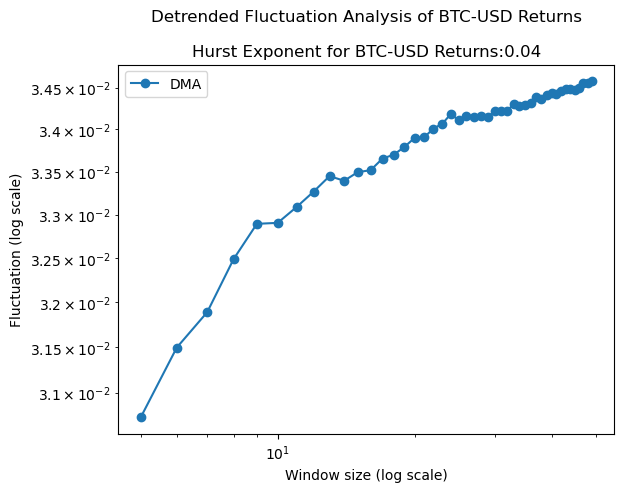

In [7]:
# Plot the results
plt.loglog(window_sizes, fluctuations, 'o-', label='DMA')
plt.xlabel('Window size (log scale)')
plt.ylabel('Fluctuation (log scale)')
plt.title(f'Detrended Fluctuation Analysis of {symbol} Returns\n\nHurst Exponent for {symbol} Returns:{hurst_exponent:.2f}')
# plt.grid(True)
plt.legend()
plt.savefig('btc-return-dfa.png')
plt.show()